Подключение библиотек и таблицы

In [ ]:
import xlrd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

book = xlrd.open_workbook('/content/drive/MyDrive/Terver/02_Автоаварии.xls')

sheet = book.sheet_by_index(0)
row = sheet.row(1)


Парсинг данных

In [ ]:
severity_types = []
visibility = []
visability_on_severity = {}

for i in range(sheet.nrows-1):
  if (sheet.cell_value(i+1, 18) != '')&(sheet.cell_value(i+1, 3) != ''):
    severity_types.append(sheet.cell_value(i+1, 3))
    visibility.append(float(sheet.cell_value(i+1, 18)))
    if visability_on_severity.get(sheet.cell_value(i+1, 3)) == None:
      visability_on_severity[sheet.cell_value(i+1, 3)] = []
    visability_on_severity[sheet.cell_value(i+1, 3)].append(float(sheet.cell_value(i+1, 18)))

print(visability_on_severity)


{'3': [10.0, 9.0, 7.0, 7.0, 3.0, 5.0, 3.0, 8.0, 6.0, 6.0, 1.5, 1.0, 2.0, 1.0, 1.0, 4.0, 2.0, 1.5, 1.2, 1.8, 1.2, 1.2, 10.0, 10.0, 5.0, 4.0, 7.0, 1.0, 3.0, 1.5, 1.5, 1.0, 4.0, 7.0, 9.0, 4.0, 10.0, 2.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 3.0, 5.0, 5.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 0.5, 1.0, 5.0, 3.0, 0.2, 1.5, 1.5, 0.8, 4.0, 1.8, 1.2, 1.2, 3.0, 5.0, 5.0, 4.0, 1.8, 3.0, 3.0, 1.8, 5.0, 2.5, 4.0, 2.5, 2.0, 7.0, 6.0, 5.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 5.0, 9.0, 1.8, 7.0, 8.0, 8.0, 5.0, 7.0, 7.0, 10.0, 10.0, 7.0, 7.0, 10.0, 10.0, 10.0, 7.0, 9.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.5, 3.0, 6.0, 2.5, 9.0, 3.0, 4.0, 2.0, 4.0, 1.5, 10.0, 9.0, 7.0, 10.0, 5.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 8.0, 8.0, 5.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 2.5, 1.5, 1.8, 2.5, 2.5, 2.5, 2.0, 2.5, 2.5, 7.0, 2.5, 9.0, 6.0, 5.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1

Задание 2. Построение графиков видимости

<ipython-input-8-45763d32b597>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visibility)


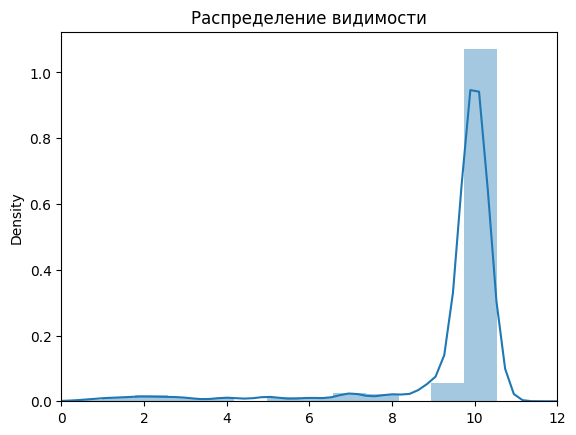

<ipython-input-8-45763d32b597>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visability_on_severity[type], label = type)
<ipython-input-8-45763d32b597>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visability_on_severity[type], label = type)
<ipython-input-8-45763d32b597>:6: UserWarning: 


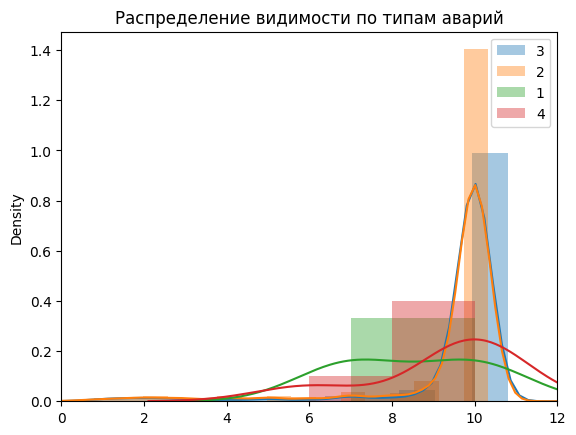

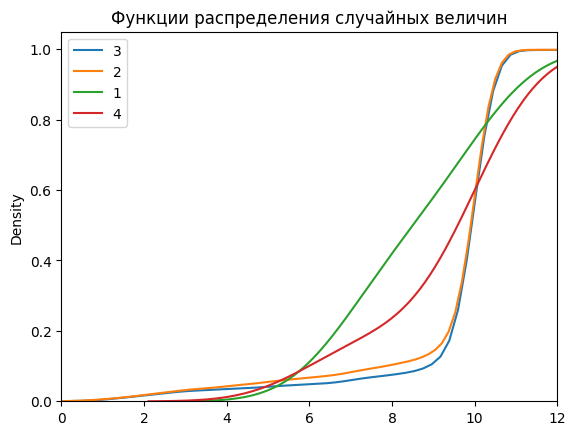

In [ ]:
sns.distplot(visibility)
plt.title("Распределение видимости")
plt.xlim([0, 12])
plt.show()

for type in visability_on_severity:
  sns.distplot(visability_on_severity[type], label = type)
plt.xlim([0, 12])
plt.legend()
plt.title("Распределение видимости по типам аварий")
plt.show()

for type in visability_on_severity:
  sns.kdeplot(visability_on_severity[type], label = type, cumulative=True)
plt.xlim([0, 12])
plt.legend()
plt.title("Функции распределения случайных величин")
plt.show()

Задание 3. Построените рядов

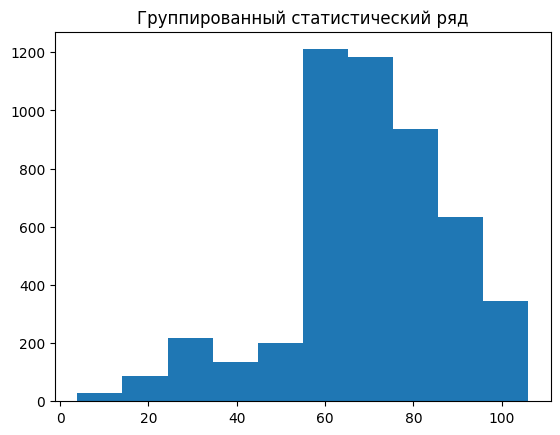

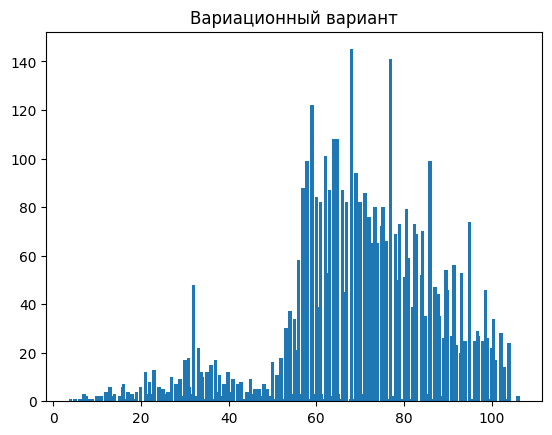

In [ ]:
temp = []
for i in range(sheet.nrows-1):
  if (sheet.cell_value(i+1, 14) != ''):
    temp.append(float(sheet.cell_value(i+1, 14)))


plt.title("Группированный статистический ряд")
plt.hist(temp)
plt.show()

from collections import Counter
temp_count = Counter(temp)

plt.title("Вариационный вариант")
plt.bar(temp_count.keys(), temp_count.values())
plt.show()


Задание 4. Самые аварийные города

{'Sacramento': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

<ipython-input-16-c004c184853d>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp[type], label = type)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-16-c004c184853d>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to 

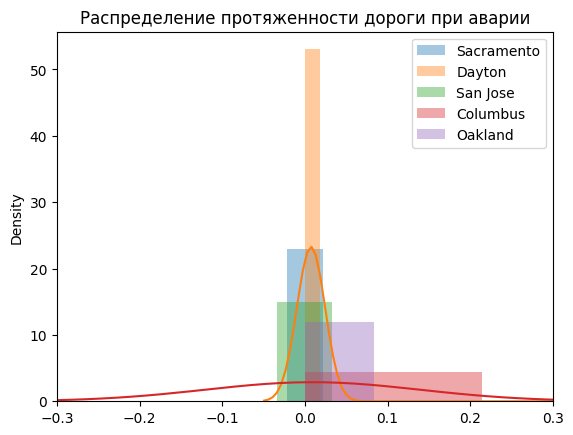

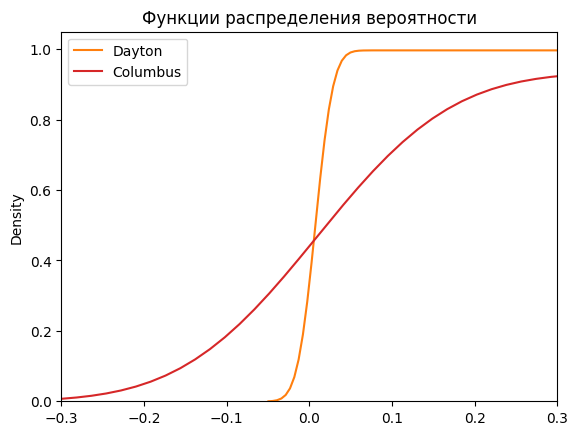

In [ ]:
city = []
five_city = {}
for i in range(sheet.nrows-1):
  city.append(sheet.cell_value(i+1, 10))
city_count = Counter(city)
five_city = [key for key, i in city_count.most_common(5)]

tmp = {}
for i in five_city:
  tmp[i] = []

for i in range(sheet.nrows-1):
  if tmp.get(sheet.cell_value(i+1, 10)) != None:
    tmp[sheet.cell_value(i+1, 10)].append(float(sheet.cell_value(i+1, 6)))
print(tmp)

for type in tmp:
  sns.distplot(tmp[type], label = type)
plt.legend()
plt.xlim([-0.3, 0.3])
plt.title("Распределение протяженности дороги при аварии")
plt.show()

for type in tmp:
  sns.kdeplot(tmp[type], label = type, cumulative=True,warn_singular=False)
plt.legend()
plt.xlim([-0.3, 0.3])
plt.title("Функции распределения вероятности")
plt.show()